# How does the average petrol station price of all types of fuel influence the sale of inner-combustion cars? Reviewed per month between January 2006 and January 2022.

Members: Mijntje Holl, Demi Reuvekamp, Hessel Rozema, Lucas Verhofstad & Job van Witsen
Student numbers: 4869346, 5050782, 4956192, 5846706, 5885558

# Main Research Question:

Is there a correlation between the amount of vehicles sold in the Netherlands and the average petrol station price of all types of fuels? Reviewed per month between January 2006 and January 2022.

# Sub Questions:

How do car sales in the Netherlands evolve over the years?

How do petrol station prices of fuel evolve over the years?

How has consumer confidence influenced car sales over the years?

How has the economic climate influenced petrol station fuel prices over the years?

How has the willingness to buy influenced the care sales and fuel prices over the years?

In [22]:
#Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

#Import data
df_sheet1 = pd.read_excel("Willingness_to_buy.xlsx")
df_sheet = df_sheet1.T
df_sheet2 = pd.read_excel("Pump_prices.xlsx", skiprows=5)
df_sheet3 = pd.read_excel("TIL6010 python.xlsx", sheet_name='Verkoopcijfers autos in nederla')

In [23]:
#Function to extract valid date
def extract_valid_date(date_str):
    match = re.search(r'\d{4}\s\w+', date_str)
    if match:
        return match.group()
    return None

In [24]:
#Cleaning Pump prices data
df_sheet2.rename(columns={"Motor fuel": "Periods"}, inplace=True)
df_sheet2 = df_sheet2[1:]
selected_columns_1 = ["Periods", "Euro 95", "Transport diesel", "LPG"]
df_sheet2 = df_sheet2[selected_columns_1]
df_sheet2['Periods'] = df_sheet2['Periods'].apply(extract_valid_date)
df_sheet2 = df_sheet2.dropna(subset=['Periods'])
df_sheet2['Periods'] = pd.to_datetime(df_sheet2['Periods'], format='%Y %B')
df_sheet2.reset_index(drop=True, inplace=True)

#Print result
df_sheet2.head()

,Periods,Euro 95,Transport diesel,LPG
0,2006-01-01,1.357,1.018,0.558
1,2006-02-01,1.330,1.020,0.553
2,2006-03-01,1.356,1.045,0.522
3,2006-04-01,1.431,1.078,0.522
4,2006-05-01,1.433,1.073,0.500


In [25]:
#Rename columns
df_sheet.columns = df_sheet.iloc[0]
df_sheet = df_sheet[2:]
df_sheet.rename(columns={"Topic": "Periods"}, inplace=True)

#Cleaning Willingness to buy data
selected_columns = ["Periods", "Consumer confidence", "Economic climate", "Willingness to buy"]
df_sheet = df_sheet[selected_columns]

#Format date
df_sheet['Periods'] = df_sheet['Periods'].apply(extract_valid_date)
df_sheet = df_sheet.dropna(subset=['Periods'])
df_sheet['Periods'] = pd.to_datetime(df_sheet['Periods'], format='%Y %B')
df_sheet.reset_index(drop=True, inplace=True)

#Print result
df_sheet.tail()

Column1,Periods,Consumer confidence,Economic climate,Willingness to buy
445,2023-05-01,-38,-53,-28
446,2023-06-01,-39,-54,-29
447,2023-07-01,-39,-54,-29
448,2023-08-01,-40,-56,-29
449,2023-09-01,-39,-57,-28


In [26]:
#Convert name to number of month
month_name_to_number = {
    'januari': 1,
    'februari': 2,
    'maart': 3,
    'april': 4,
    'mei': 5,
    'juni': 6,
    'juli': 7,
    'augustus': 8,
    'september': 9,
    'oktober': 10,
    'november': 11,
    'december': 12
}
df_sheet3['Periods'] = pd.to_datetime(df_sheet3['Jaar'].astype(str) + df_sheet3['Maand'].map(month_name_to_number).astype(str), format='%Y%m')
selected_columns3 = ["Periods", "Verkoop"]
df_sheet3 = df_sheet3[selected_columns3]

#Print result
df_sheet3.head()

,Periods,Verkoop
0,2023-01-01,32845
1,2023-02-01,28128
2,2023-03-01,37452
3,2023-04-01,29669
4,2023-05-01,33135


In [27]:
#Merge sheets
result = pd.merge(df_sheet, df_sheet2, on="Periods", how="outer")
result = pd.merge(result, df_sheet3, on="Periods", how="outer")
result.head()

,Periods,Consumer confidence,Economic climate,Willingness to buy,Euro 95,Transport diesel,LPG,Verkoop
0,1986-04-01,2,6,0,NaN,NaN,NaN,NaN
1,1986-05-01,8,17,1,NaN,NaN,NaN,NaN
2,1986-06-01,15,33,3,NaN,NaN,NaN,NaN
3,1986-07-01,20,45,4,NaN,NaN,NaN,NaN
4,1986-08-01,21,47,4,NaN,NaN,NaN,NaN


In [28]:
#Create a mask
mask = (result['Periods'] >= '2006-01-01') & (result['Periods'] <= '2022-12-31')

# Apply the mask to filter the DataFrame
result = result[mask]

# Reset the index to make it continuous
result.reset_index(drop=True, inplace=True)
result.tail()

,Periods,Consumer confidence,Economic climate,Willingness to buy,Euro 95,Transport diesel,LPG,Verkoop
199,2022-08-01,-54,-74,-40,2.065,1.974,0.849,23638.0
200,2022-09-01,-59,-79,-46,1.967,1.999,0.841,25792.0
201,2022-10-01,-59,-75,-48,1.995,2.076,0.834,28992.0
202,2022-11-01,-56,-72,-46,1.912,1.925,0.824,27810.0
203,2022-12-01,-52,-65,-43,1.759,1.751,0.796,30900.0


In [29]:
#Convert values to numeric
result['Consumer confidence'] = pd.to_numeric(result['Consumer confidence'], errors='coerce')
result['Economic climate'] = pd.to_numeric(result['Economic climate'], errors='coerce')
result['Willingness to buy'] = pd.to_numeric(result['Willingness to buy'], errors='coerce')
result['Euro 95'] = pd.to_numeric(result['Euro 95'], errors='coerce')
result['Transport diesel'] = pd.to_numeric(result['Transport diesel'], errors='coerce')
result['LPG'] = pd.to_numeric(result['LPG'], errors='coerce')

# How do car sales in the Netherlands evolve over the years?

To answer the main research question, we need to gain a deeper understanding of the car sales industry. Therefore, we've crafted an informative graph that traces the monthly car sales spanning the years 2006 to 2023. 

An interesting trend emerges when the graph is examined in further detail. Despite the significant differences in peak values between the years 2006 to 2013 and the more recent years, the average car sales over this period have remained relatively consistent. The min-max line for the earlier years shows dramatic maximum and minimum values, which indicates substantial fluctuations. The solid trendline represents the car sales and this trendline remains quite steady during the last years, indicating that, on average, monthly car sales have shown some sort of stability.

This consistency in average car sales suggests that the car sales market, during the recent years, has reached a point of equilibrium where the variations between high and low sales months have quite balanced out over time. This form of stability can be seen as a reflection of a more mature and less turbulent market, which is of great interest to industry analysts and stakeholders.

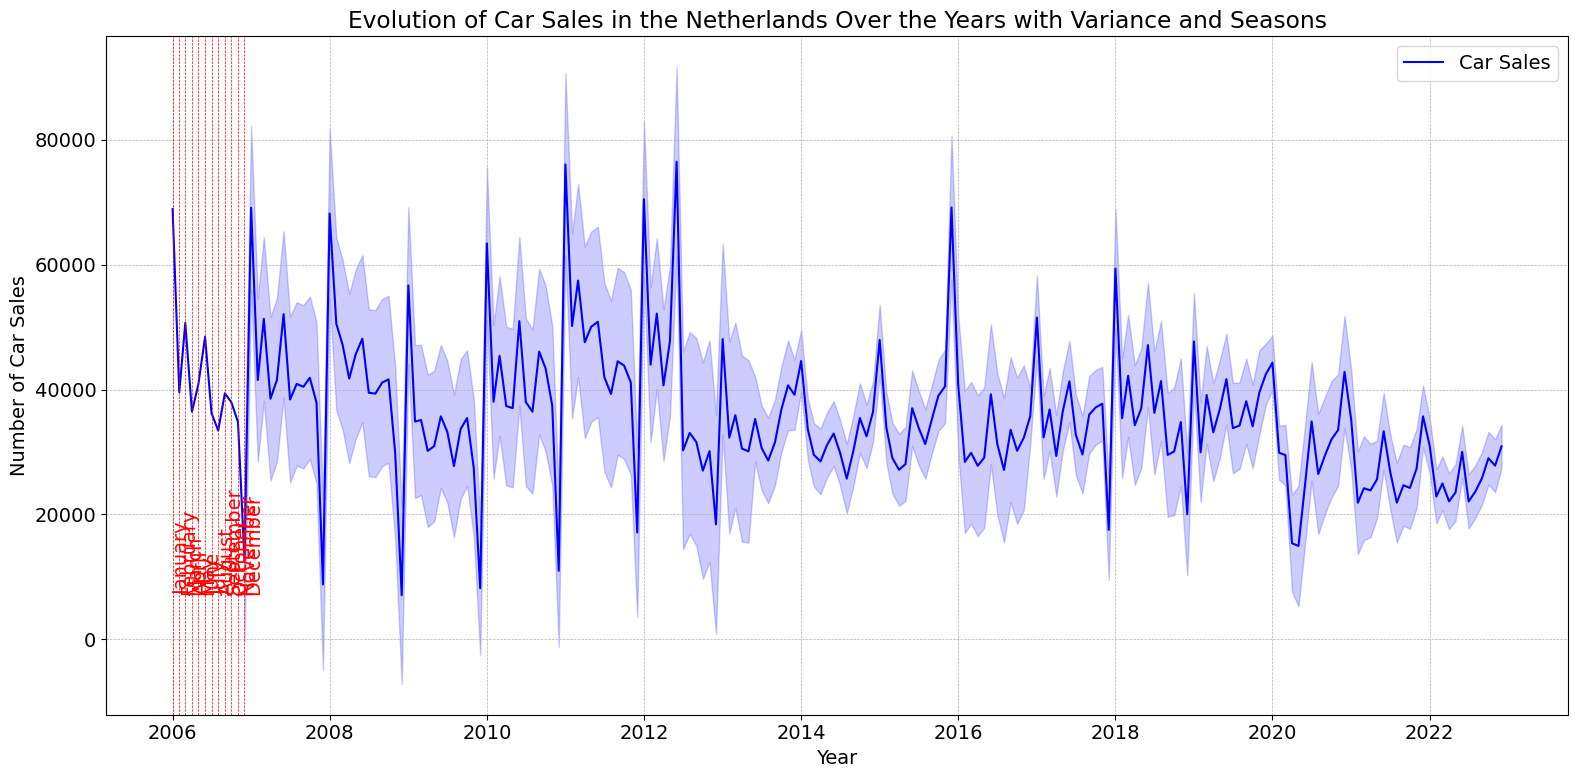

In [30]:
# Load car sales data from the Excel file
car_sales_data = pd.read_excel('Final_TIL.xlsx')

# Calculate the rolling standard deviation for variance
window_size = 12
rolling_std = car_sales_data['Verkoop'].rolling(window=window_size).std()

# Plotting the graph with min-max line, trend (average), and variance
plt.figure(figsize=(16, 8))

# Main trend line (average)
plt.plot(car_sales_data['Periods'], car_sales_data['Verkoop'], label='Car Sales', color='blue', linestyle='-')

# Variance shading
plt.fill_between(car_sales_data['Periods'], car_sales_data['Verkoop'] - rolling_std, car_sales_data['Verkoop'] + rolling_std, color='blue', alpha=0.2)

# Annotations for seasons
seasons = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i, month in enumerate(seasons):
    plt.axvline(x=car_sales_data['Periods'][i], color='red', linestyle='--', linewidth=0.5)
    plt.text(car_sales_data['Periods'][i], car_sales_data['Verkoop'].min(), month, rotation=90, verticalalignment='bottom', color='red')

plt.title('Evolution of Car Sales in the Netherlands Over the Years with Variance and Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Car Sales')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# How do petrol station prices of fuel evolve over the years?

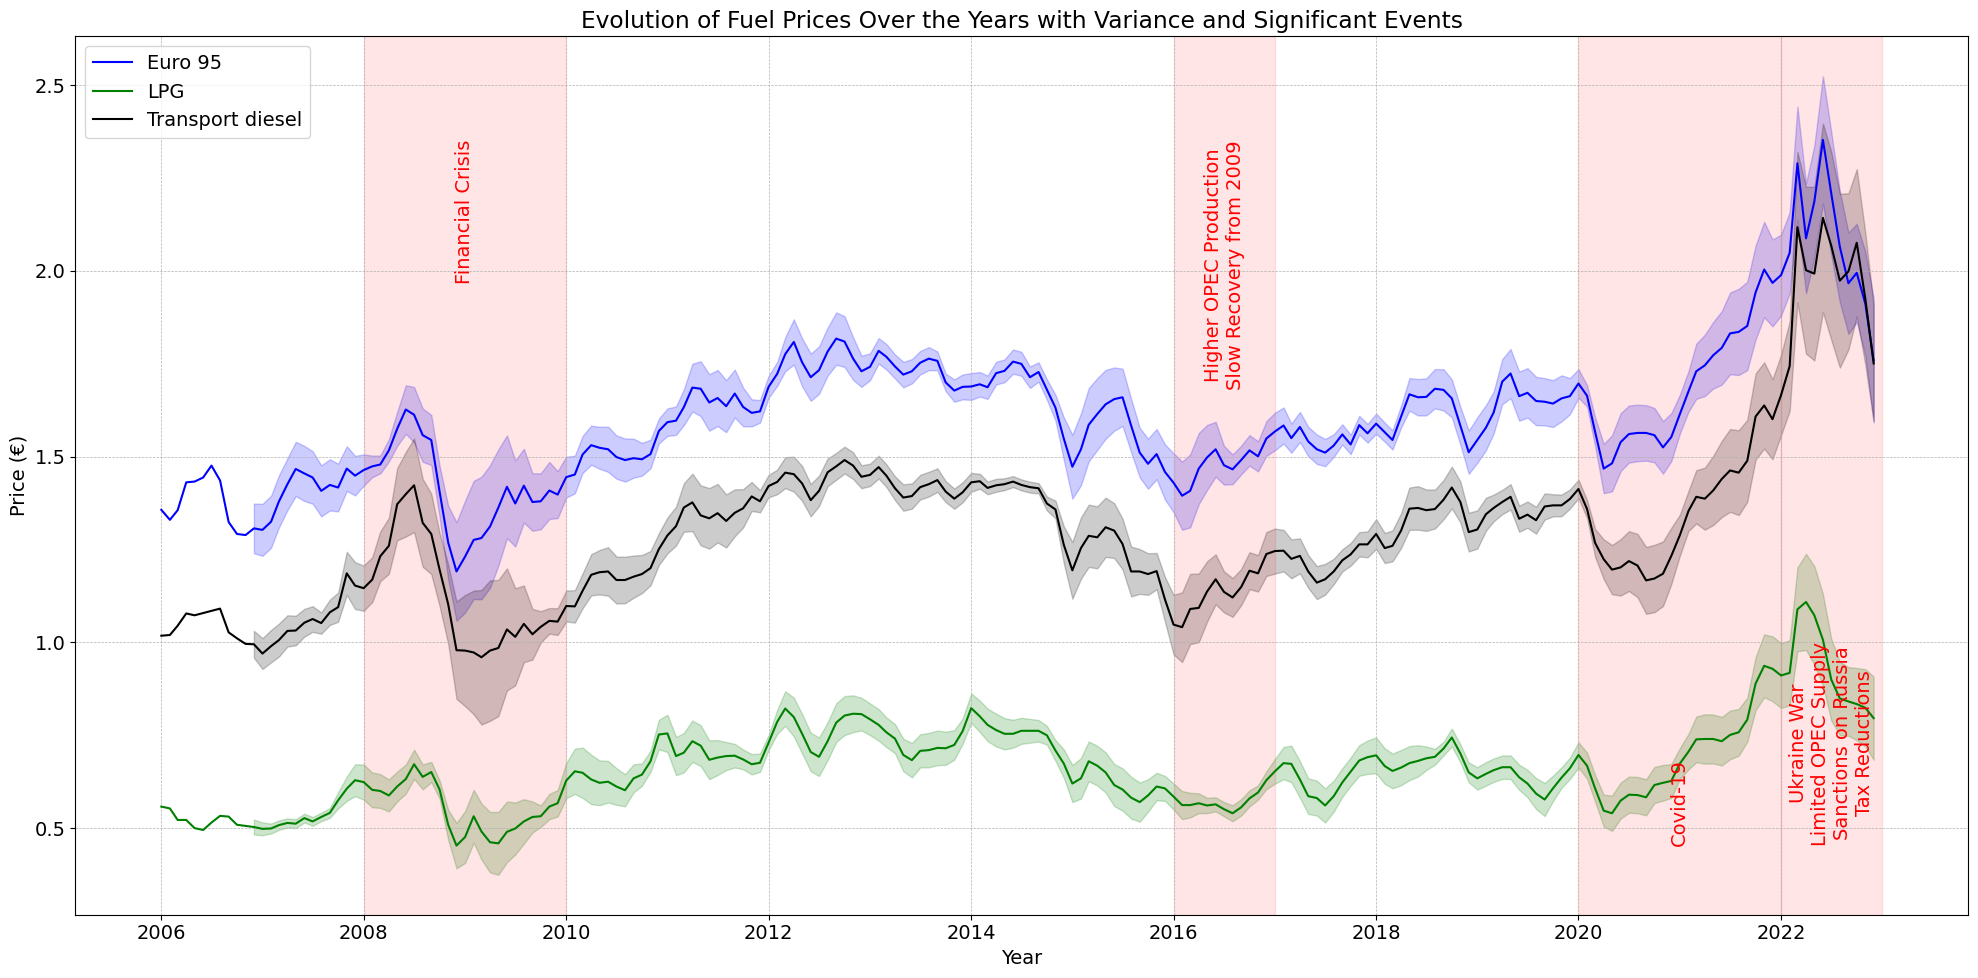

In [31]:
#Setting the font size for figure to 14
plt.rcParams.update({'font.size': 14})

# Forward fill NaN values for each fuel type
fuel_types = ['Euro 95', 'LPG', 'Transport diesel']
for fuel in fuel_types:
    result[fuel].fillna(method='ffill', inplace=True)

# Calculate the rolling standard deviation for each fuel type
rolling_stds = {}
for fuel in fuel_types:
    rolling_stds[fuel] = result[fuel].rolling(window=12).std()

# Plotting the graph with variance (confidence interval) for each fuel type
plt.figure(figsize=(20, 10))

colors = {'Euro 95': 'blue', 'LPG': 'green', 'Transport diesel': 'black'}
for fuel, color in colors.items():
    plt.plot(result['Periods'], result[fuel], label=fuel, color=color, linestyle='-')
    plt.fill_between(result['Periods'], result[fuel] - rolling_stds[fuel], result[fuel] + rolling_stds[fuel], color=color, alpha=0.2)

# Annotations and events with durations
events_durations = {
    ('2008-01-01', '2009-12-31'): ('Financial Crisis', 'top'),
    ('2016-01-01', '2016-12-31'): ('Higher OPEC Production\nSlow Recovery from 2009', 'top'),
    ('2020-01-01', '2022-01-01'): ('Covid-19', 'bottom'),
    ('2022-01-01', '2022-12-31'): ('Ukraine War\nLimited OPEC Supply\nSanctions on Russia\nTax Reductions', 'bottom')
}

for (start_date, end_date), (event, valign) in events_durations.items():
    plt.axvspan(pd.Timestamp(start_date), pd.Timestamp(end_date), color='red', alpha=0.1)
    
    # Calculate the horizontal midpoint of the event duration
    midpoint = pd.Timestamp(start_date) + (pd.Timestamp(end_date) - pd.Timestamp(start_date)) / 2
    
    # Use the specified vertical alignment from the dictionary
    y_pos = max([result[fuel].max() for fuel in fuel_types]) if valign == 'top' else min([result[fuel].min() for fuel in fuel_types])
    plt.text(midpoint, y_pos, event, rotation=90, verticalalignment=valign, color='red', ha='center')

#plot
plt.title('Evolution of Fuel Prices Over the Years with Variance and Significant Events')
plt.xlabel('Year')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Fuel prices over the years
The fuel prices have been plotted for three different types of fuel: Euro 95, LPG and Transport Diesel. This will give insight in how the fuel prices behave. The variance of the rolling average is also plotted in a shade of the color, as can be seen in the figure above. The different fuel types follow roughly the same effects. Only the variance varies per fuel type, LPG seems to have the smallest variance where Diesel has the biggest. 

The dutch fuel price is strongly dependent on the oil price. The oil-price dropped in 2009 due to the financial crisis, which is also seen in the fuel price graph (Mert, 2016). In 2016 the oil price dropped again, this time due to higher production from the OPEC countries and slow recovery from the 2009 financial crisis (Stocker, Baffes, & Vorisek, 2018). The fuel price peeks in 2022. This is caused by limited supply of OPEC and by sanctions on Russia by the European Union. In this time the government also gave tax reductions on fuel (ANP, 2023). 

Overall an increase in fuel-price can be seen. The variance of the fuel-price seems to be higher when there are crises, as seen in 2009 (financial crisis), 2020 (Covid-19) and 2022 (Ukraine war), and can have a positive or negative effect on the fuel price. Also the OPEC production seems to have a big impact on the fuel price

# What is the relation between fuel price, car sales and consumer confidence?

Looking at the graphs for consumer confidence and car sales it can be observed that there is a small correlation between the two. When consumer confidence reduces, car sales tend to decrease as well.

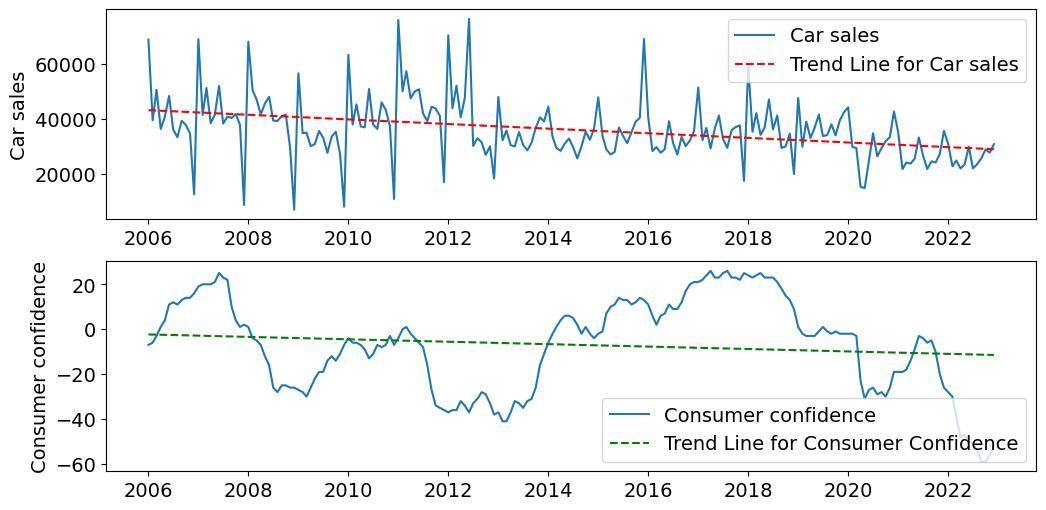

In [32]:
x = result['Periods']
y1 = result['Consumer confidence']
y2 = result['Verkoop']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

trend_line_y2 = np.polyfit(range(len(x)), y2, 1)
trend_line_y1 = np.polyfit(range(len(x)), y1, 1)

trend_line_y2_data = np.polyval(trend_line_y2, range(len(x)))
trend_line_y1_data = np.polyval(trend_line_y1, range(len(x)))


axes[0].plot(x, y2, label='Car sales')
axes[0].plot(x, trend_line_y2_data, label='Trend Line for Car sales', linestyle='--', color='red')
axes[1].plot(x, y1, label='Consumer confidence')
axes[1].plot(x, trend_line_y1_data, label='Trend Line for Consumer Confidence', linestyle='--', color='green')

axes[0].set_ylabel('Car sales')
axes[1].set_ylabel('Consumer confidence')
axes[0].legend()
axes[1].legend()

plt.show()

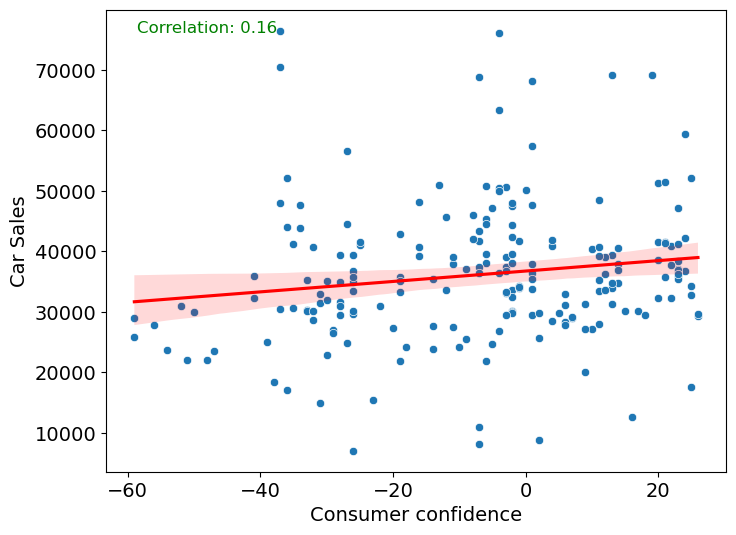

In [33]:
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x='Consumer confidence', y='Verkoop', data=result)
sns.regplot(x='Consumer confidence', y='Verkoop', data=result, scatter=False, color='red', label='Linear Regression Line')

correlation = result['Consumer confidence'].corr(result['Verkoop'])

plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='green')

plt.ylabel('Car Sales')

plt.show()

When a scatterplot is made between fuel prices and consumer confidence it can be noticed that these are negatively correlated. When fuel prices are low, consumer confidence will increase.

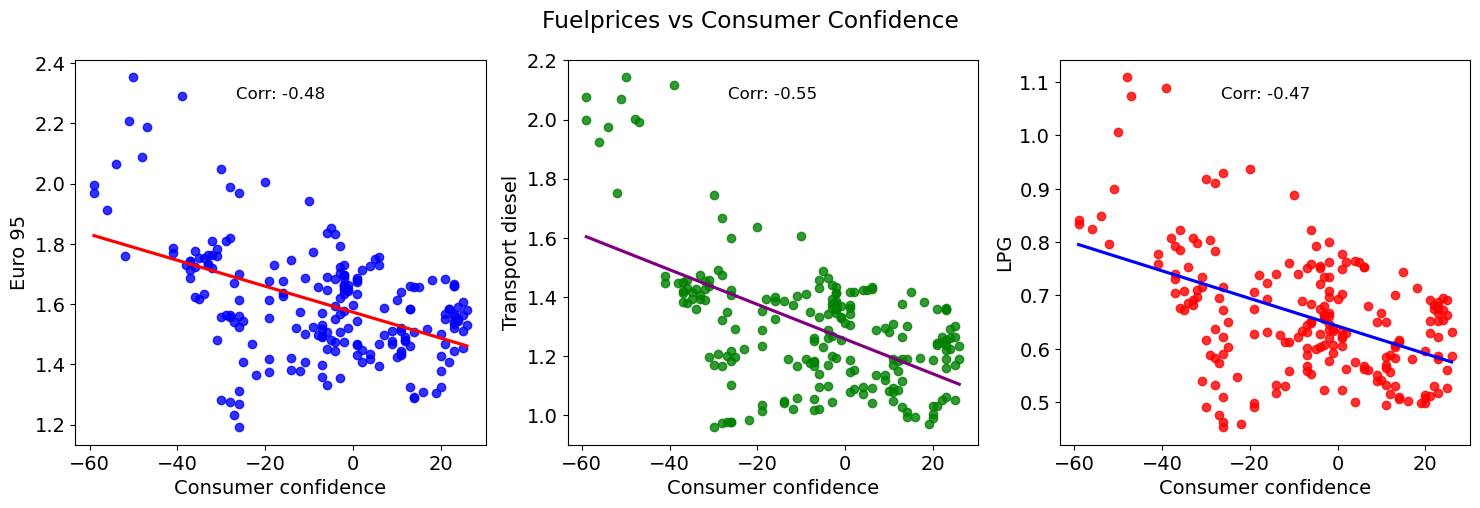

In [34]:
data = result[['Consumer confidence', 'Euro 95', 'Transport diesel', 'LPG']]

scatter_colors = ['blue', 'green', 'red']
line_colors = ['red', 'purple', 'blue']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, fuel in enumerate(['Euro 95', 'Transport diesel', 'LPG']):
    scatterplot = sns.regplot(data=data, x='Consumer confidence', y=fuel, ci=None, color=scatter_colors[i], ax=axes[i])
    
    scatterplot.get_lines()[0].set_color(line_colors[i])
    
    correlation = data[['Consumer confidence', fuel]].corr().iloc[0, 1]
    
    axes[i].annotate(f'Corr: {correlation:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white', ha='center')
    
    axes[i].set_xlabel('Consumer confidence')
    axes[i].set_ylabel(fuel)

plt.suptitle('Fuelprices vs Consumer Confidence')

plt.show()

# How has the economic climate influenced petrol station fuel prices over the years?

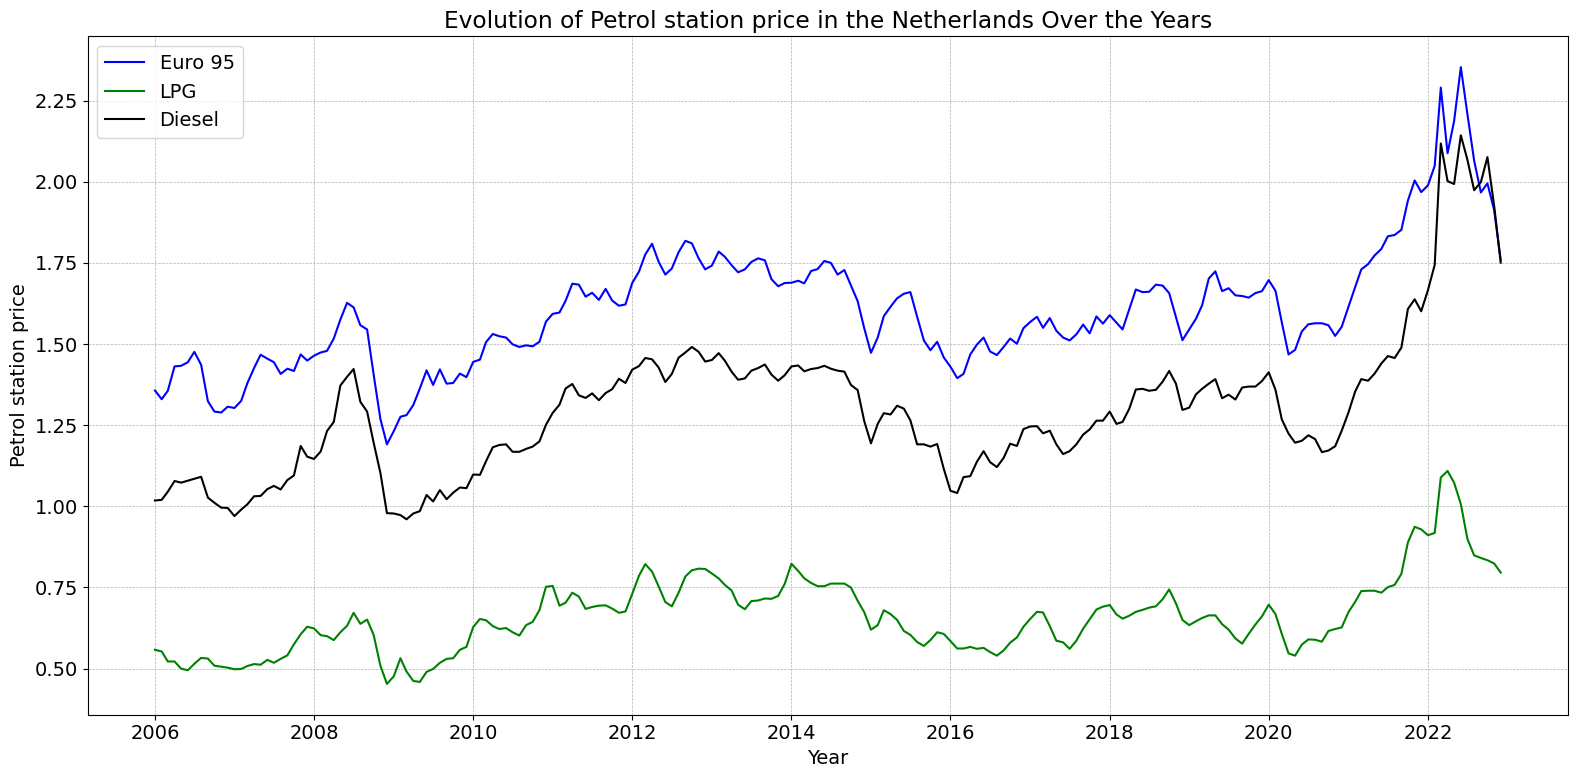

In [35]:
#I am still working on the rolling average to show where the peaks and the valleys of the prices are
#I want to compare those to the peaks valleys of the Economic climate
#So I still have to write a function that calculates the peaks and valleys
window_size = 12  # You can adjust the window size as needed
Euro = result['Euro 95'].rolling(window=window_size).std()
LPG = result['LPG'].rolling(window=window_size).std()
Euro = result['Transport diesel'].rolling(window=window_size).std()

plt.figure(figsize=(16, 8))
plt.plot(result['Periods'], result['Euro 95'], label='Euro 95', color='blue', linestyle='-')
plt.plot(result['Periods'], result['LPG'], label='LPG', color='green', linestyle='-')
plt.plot(result['Periods'], result['Transport diesel'], label='Diesel', color='black', linestyle='-')

plt.title('Evolution of Petrol station price in the Netherlands Over the Years')
plt.xlabel('Year')
plt.ylabel('Petrol station price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# How has the willingness to buy influenced the car sales and fuel prices over the years?

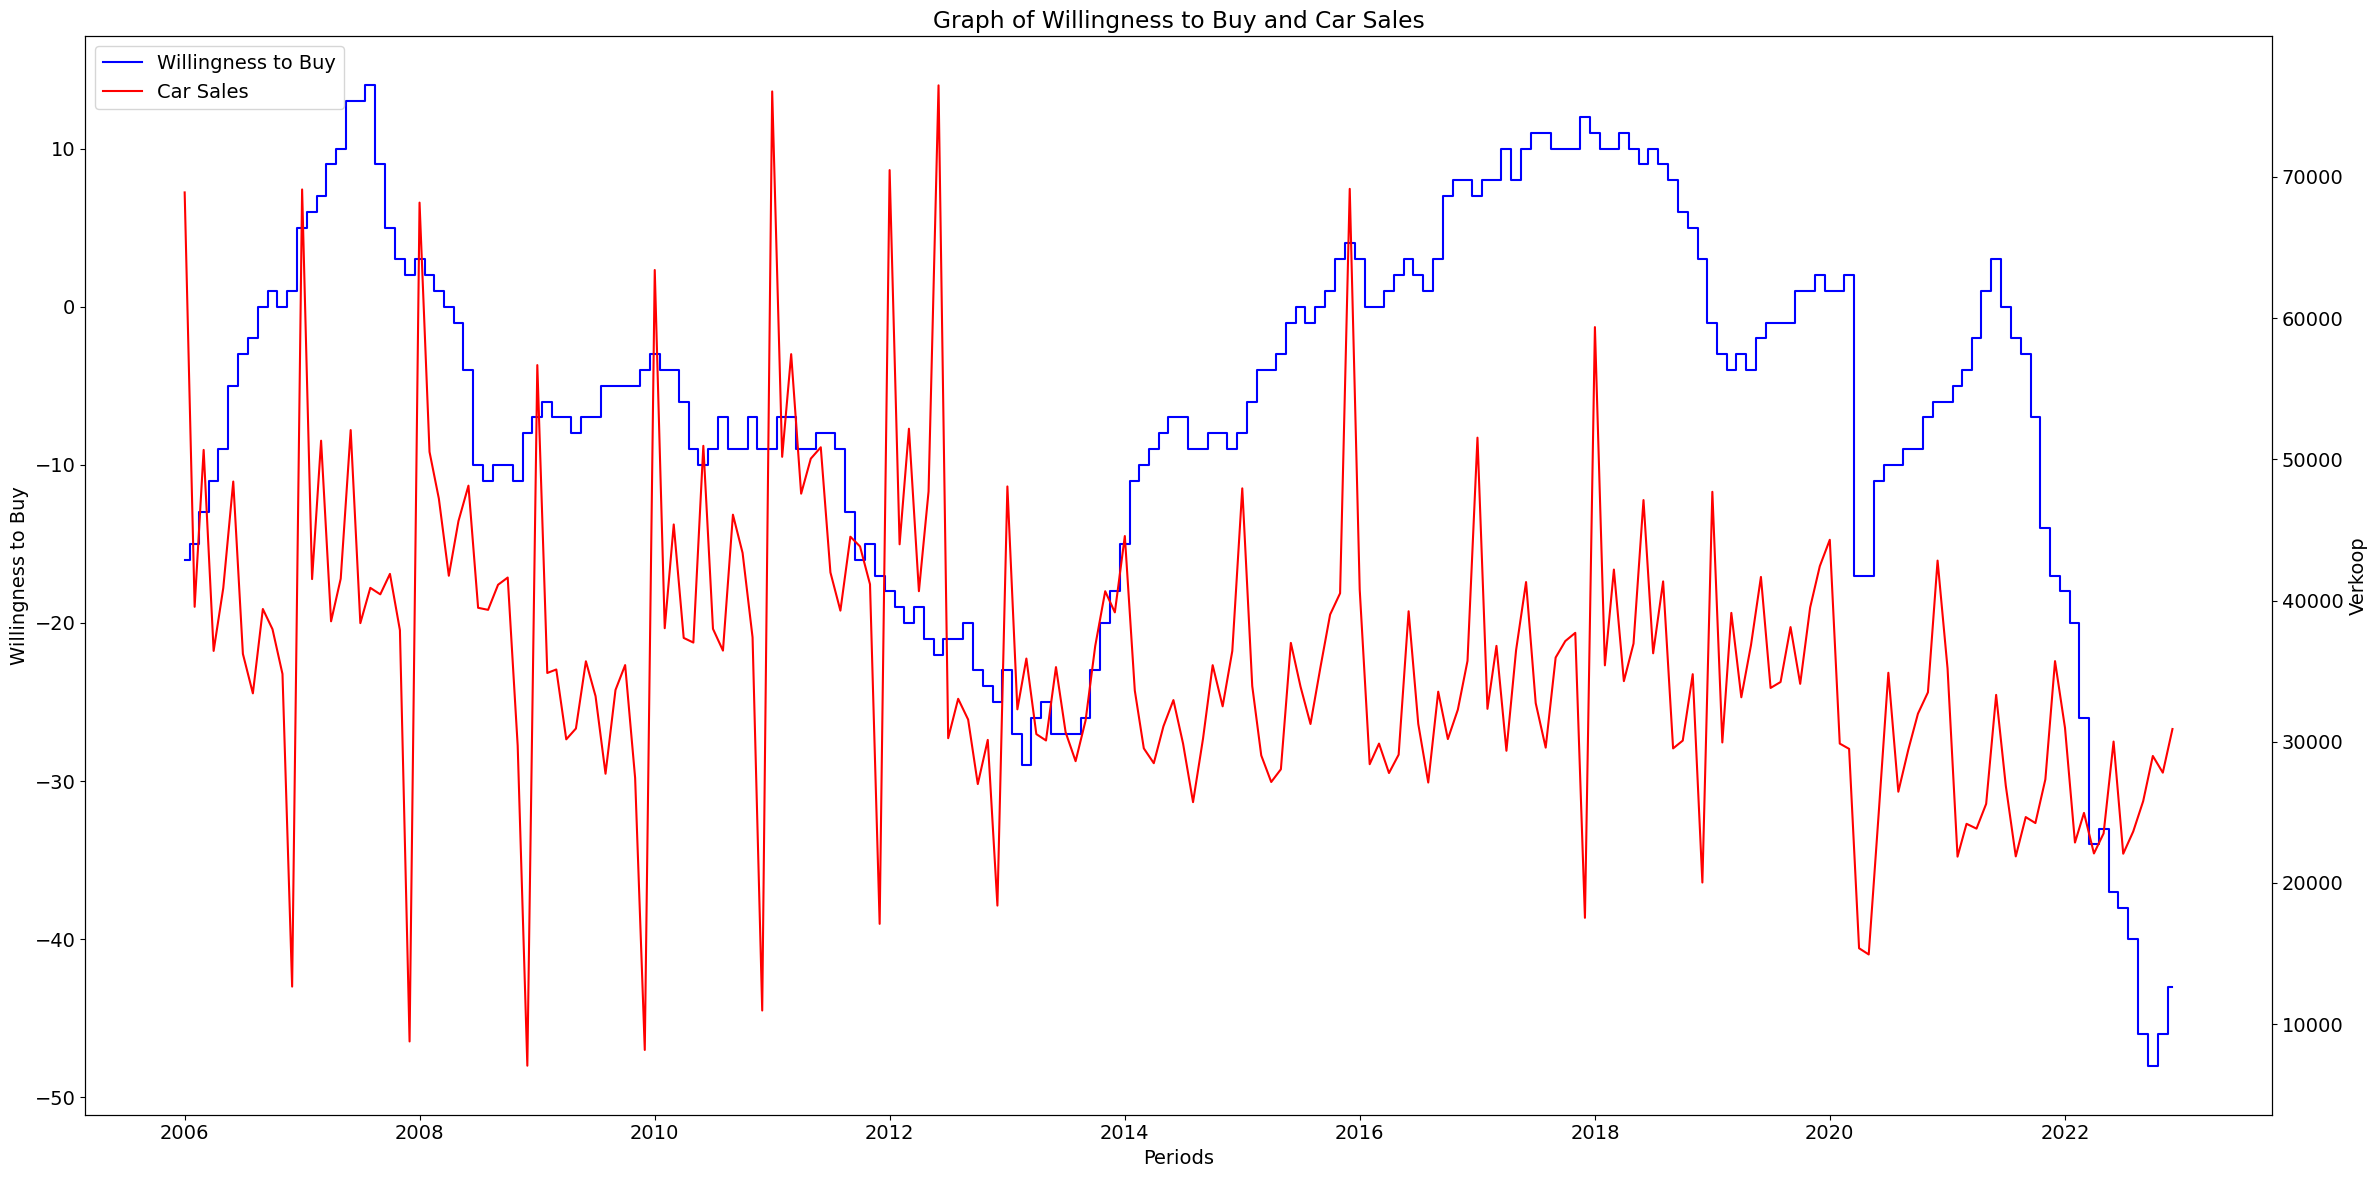

In [36]:
# Create a temporary DataFrame for plotting without modifying the original result DataFrame
plot_data = result[['Periods', 'Willingness to buy', 'Verkoop']].copy()

# Create a figure 
fig, ax1 = plt.subplots(figsize=(24, 12))

# Sort the temporary DataFrame by Periods
sorted_data = plot_data.sort_values(by='Periods')

# Create a staircase graph for 'Willingness to Buy' on the left Y-axis
ax1.step(sorted_data['Periods'], sorted_data['Willingness to buy'], label='Willingness to Buy', where='mid', color='b')
ax1.set_xlabel('Periods')
ax1.set_ylabel('Willingness to Buy', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Graph of Willingness to Buy and Car Sales')

# Create a second set of axes on the right side
ax2 = ax1.twinx()

# Create a regular line plot for 'Verkoop' on the right Y-axis
ax2.plot(sorted_data['Periods'], sorted_data['Verkoop'], label='Car Sales', color='r')
ax2.set_ylabel('Verkoop', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a legend that includes both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Consumer willingness to buy can be defined in the following way: The behavioral intention of a consumer to buy a particular product (Donato & Raimondo, 2020). Where some people state that buyers have all control over prices, others state that prices are completely up to sellers. Purely economically speaking, the price of fuel is not and cannot be determined by buyers alone. The price of any good is a function of both supply and demand (Nielsen, 2021). There are basically two options to bring down the price of fuels, they are to either increase the aggregate supply or decrease the aggregate demand.
Considering the willingness to buy being the intention of a consumer to buy a product, this can affect the price of fuels. As can bee seen in the graph below, there are several points where the willingness to buy decreases just before the fuel price drops. Simultaneously it can be seen that there are peaks in willingness to buy followed by peaks in fuel price. However, willingness to buy is never the only factor influencing the prices. There are completely opposite situations happening where the willingness to buy is low, while the fuel prices go up due to other important and influencing externalities.

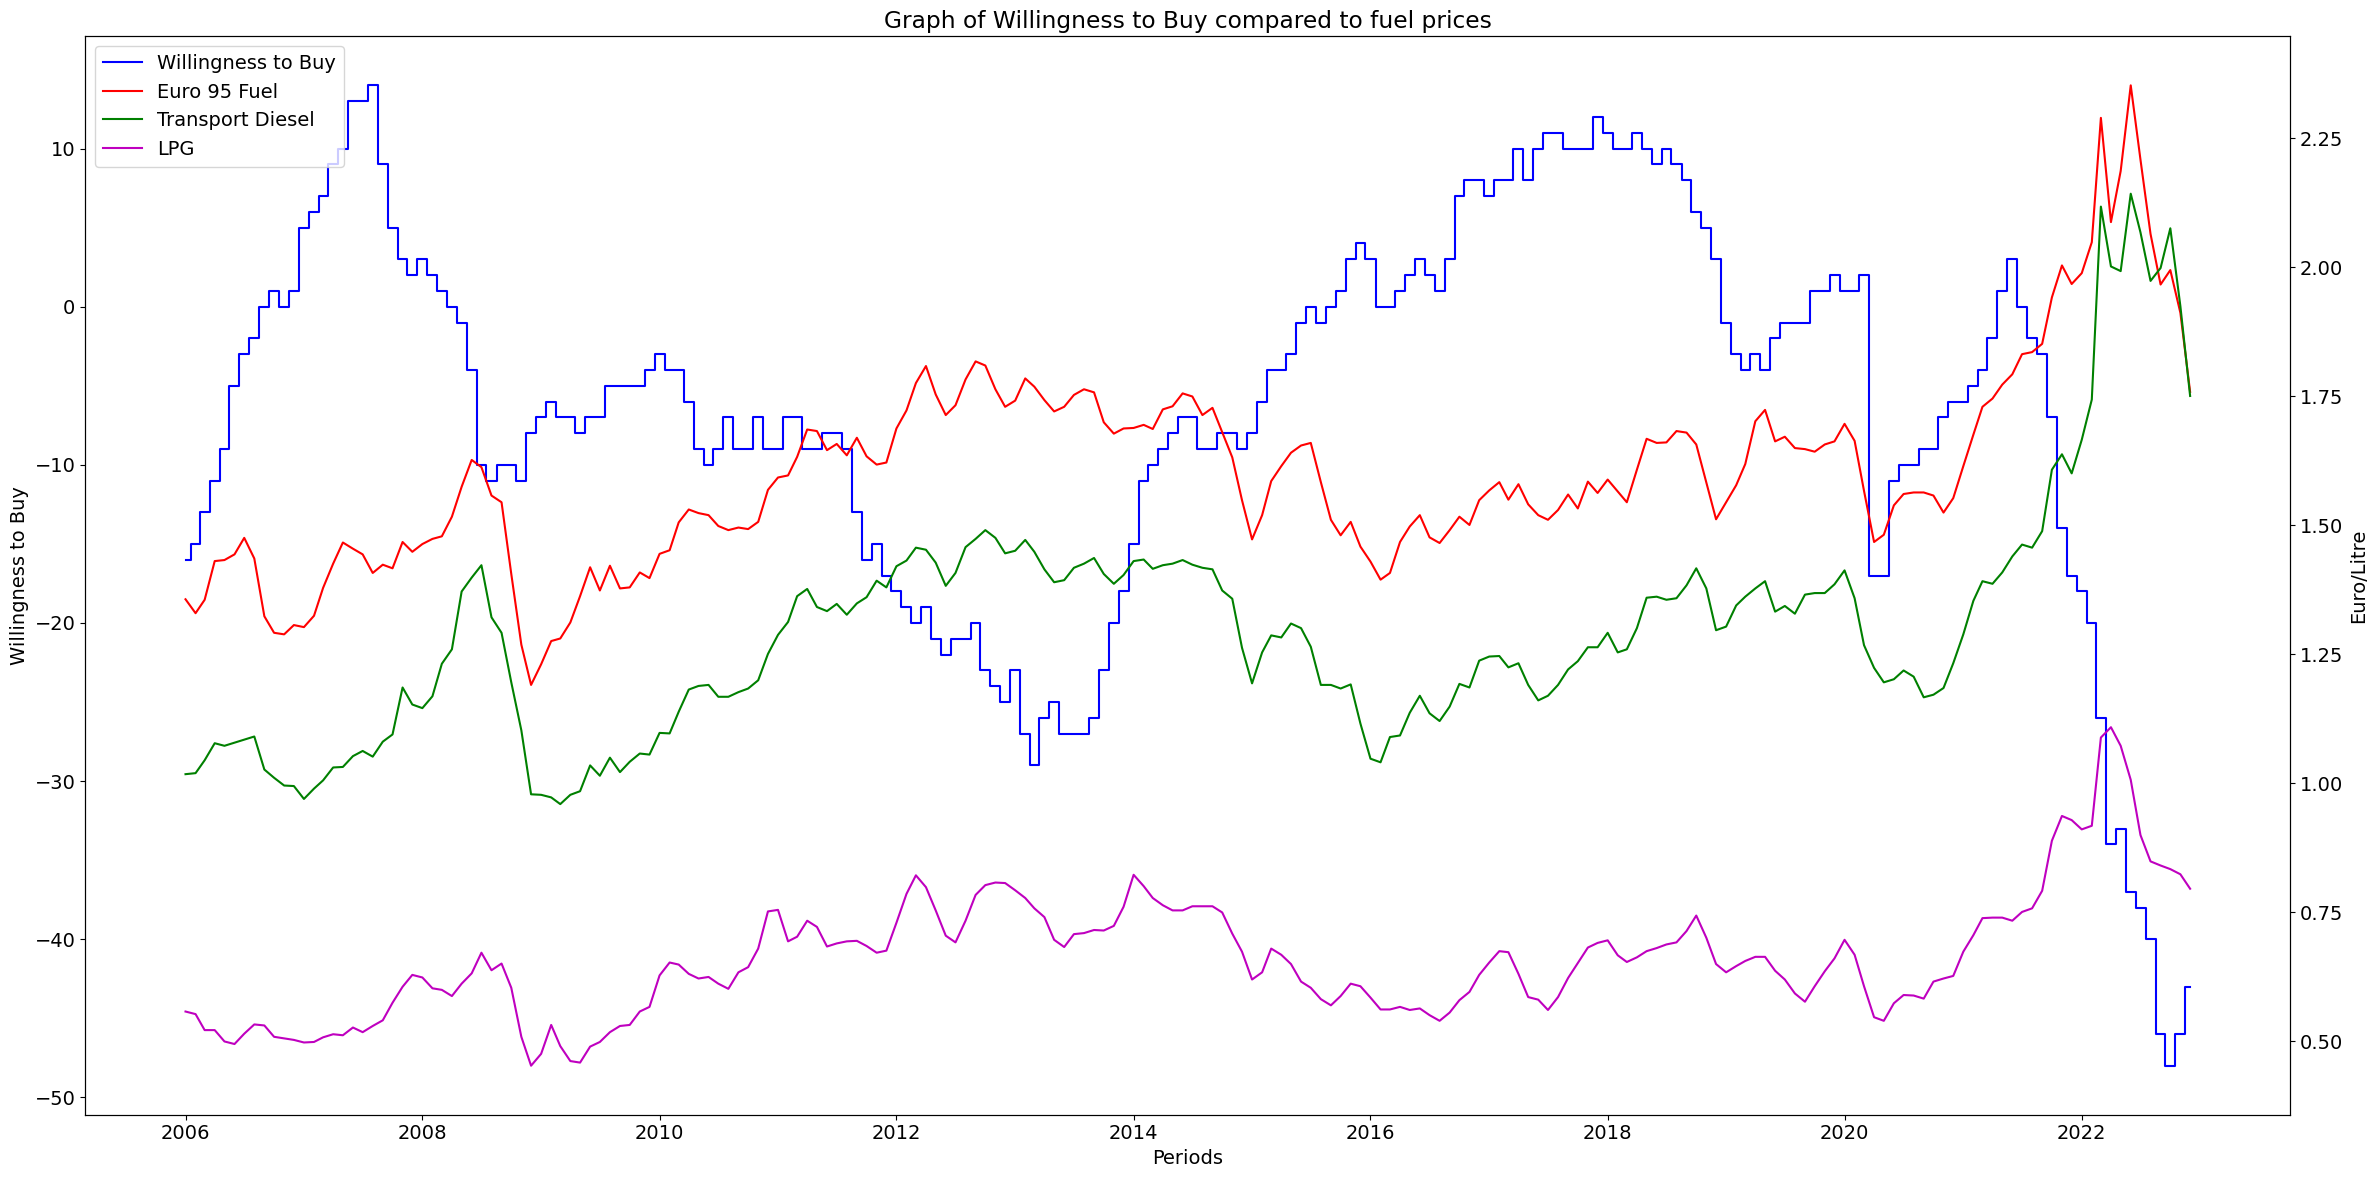

In [37]:
# Select the necessary columns without overwriting the 'result' DataFrame
plot_data = result[['Periods', 'Willingness to buy', 'Euro 95', 'Transport diesel', 'LPG']]

# Create a figure 
fig, ax1 = plt.subplots(figsize=(24, 12))

# Sort the DataFrame by Periods
plot_data = plot_data.sort_values(by='Periods')

# Create a staircase graph for 'Willingness to Buy' on the left Y-axis
ax1.step(plot_data['Periods'], plot_data['Willingness to buy'], label='Willingness to Buy', where='mid', color='b')
ax1.set_xlabel('Periods')
ax1.set_ylabel('Willingness to Buy', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Graph of Willingness to Buy compared to fuel prices')

# Create a second set of axes on the right side
ax2 = ax1.twinx()

# Create line plots for fuel prices on the right Y-axis
ax2.plot(plot_data['Periods'], plot_data['Euro 95'], label='Euro 95 Fuel', color='r')
ax2.plot(plot_data['Periods'], plot_data['Transport diesel'], label='Transport Diesel', color='g')
ax2.plot(plot_data['Periods'], plot_data['LPG'], label='LPG', color='m')
ax2.set_ylabel('Euro/Litre')
ax2.tick_params(axis='y', labelcolor='black')

# Add a legend that includes all lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
# Select the columns of interest
selected_columns = ['Periods', 'Willingness to buy', 'Euro 95', 'Transport diesel', 'LPG']
result = result[selected_columns]

# Sort the DataFrame by Periods
result = result.sort_values(by='Periods')

# Create a figure using Plotly
fig = go.Figure()

# Add the first Y-axis for 'Willingness to Buy'
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Willingness to buy'], mode='lines', name='Willingness to Buy', yaxis='y1'))

# Add the second Y-axis for 'Euro 95', 'Transport diesel', and 'LPG'
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Euro 95'], mode='lines', name='Euro 95 Fuel', yaxis='y2'))
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Transport diesel'], mode='lines', name='Transport Diesel', yaxis='y2'))
fig.add_trace(go.Scatter(x=result['Periods'], y=result['LPG'], mode='lines', name='LPG', yaxis='y2'))

# Set the layout with multiple Y-axes
fig.update_layout(
    xaxis=dict(title='Periods'),
    yaxis=dict(title='Willingness to Buy', side='left', showgrid=False, titlefont=dict(color='blue')),
    yaxis2=dict(title='Euro/Litre', overlaying='y', side='right', showgrid=False, titlefont=dict(color='black')),
    title='Graph of Willingness to Buy and Car Sales'
)

# Show the interactive plot
fig.show()

# Sources
Donato, C., & Raimondo, M. A. (2020). Tactile sensations in E-Retailing. In Advances in marketing, customer relationship management, and e-services book series (pp. 225–247). https://doi.org/10.4018/978-1-7998-2220-2.ch010

Nielsen, B. (2021). Why you can't influence gas prices. Investopedia. https://www.investopedia.com/articles/economics/08/gas-price-emails.asp 

Stocker, M., Baffes, J., & Vorisek, D. (2018, January 18). What triggered the oil price plunge of 2014-2016 and why it failed to deliver an economic impetus in eight charts. World Bank Blogs. https://blogs.worldbank.org/developmenttalk/what-triggered-oil-price-plunge-2014-2016-and-why-it-failed-deliver-economic-impetus-eight-charts&#8203

Mert, U. R. A. L. (2016). The impact of the global financial crisis on crude oil price volatility. Journal of Management and Economics Research, 14(2), 64-76.

ANP. (2023, April 22). Weer hogere prijs aan de pomp: hoe komt het? NOS. https://nos.nl/artikel/2472353-weer-hogere-prijs-aan-de-pomp-hoe-komt-het

# Data sets

  
**Consumer confidence, economic climate and willingness to buy:**

https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83693ENG&_theme=1095

This table contains the (seasonally) adjusted figures on opinions and expectations of Dutch consumers on general economic developments and their own financial situation. The indicators of consumer confidence, economic climate and willingness are based on these opinions and expectations.
<br>
<br>

**Amount of car sales in the Netherlands:**  <br>

https://www.autoweek.nl/verkoopcijfers/

This data set provides the Dutch sales figures dating back to 1983. The data is retrievable by year and by brand. On the brand page, sales figures can be found per model."  
<br>
<br>
**Petrol station fuel prices per fuel type:**

https://opendata.cbs.nl/statline/#/CBS/en/dataset/81567ENG/table?ts=1696237964372

In this data set the pump prices of all motor fuels are provided. They are measured per month for every year. The prices are shown per location of the petrol station and per fuel type.